# Try to build a DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
rps_data = pd.read_csv('rps_data_cv.csv', index_col=0)
cpu_data = pd.read_csv('cpu_data_cv.csv', index_col=0)

In [3]:
rps_data.index = pd.to_datetime(rps_data.index)
cpu_data.index = pd.to_datetime(cpu_data.index)

In [4]:
def load_csv_data(filename, ppd=720):
    """
    Load the csv data.
    
    Inputs:
    - filename: The name of the csv file
    - ppd: Points Per Day, default 720 (from 9:00 to 15:00, step is 30s)
    
    Outputs:
    - data: DataFrame format data with its DatetimeIndex that used to plot
    - data_ndarray: The np.ndarray format data which shap is (days x ppd)
    """
    data = pd.read_csv(filename, index_col=0)
    data.index = pd.to_datetime(data.index)
    days = data.shape[0] / ppd
    data_ndarray = np.reshape(data.values, (days, ppd))
    return data, data_ndarray

In [5]:
rps_data, rps_data_ndarray = load_csv_data('rps_data_cv.csv')
cpu_data, cpu_data_ndarray = load_csv_data('cpu_data_cv.csv')

In [6]:
rps_data_ndarray

array([[  86.01390167,   88.23485333,   93.61510009, ...,  174.9204658 ,
         170.6754949 ,  171.8362896 ],
       [  80.18871011,   82.26485842,   86.98906694, ...,  177.2889625 ,
         179.4972829 ,  179.2605378 ],
       [  85.71574259,   88.50947544,   95.04684614, ...,  174.7262325 ,
         178.932594  ,  177.8658605 ],
       ..., 
       [  44.35839081,   48.13807077,   55.72416285, ...,  170.1648769 ,
         170.5292655 ,  170.64629   ],
       [  43.67408919,   46.51210428,   52.3281653 , ...,  178.8790686 ,
         178.7436909 ,  176.8581722 ],
       [  41.35895199,   44.13307594,   49.95168455, ...,  177.3657107 ,
         178.8374368 ,  179.0757682 ]])

In [7]:
cpu_data_ndarray

array([[ 1.22812387,  1.24169409,  1.26315726, ...,  2.35393251,
         2.35201571,  2.31331258],
       [ 1.21130743,  1.23289813,  1.28391278, ...,  2.34977329,
         2.35669506,  2.36480893],
       [ 1.25652324,  1.27272062,  1.30275046, ...,  2.40862891,
         2.38527387,  2.3770985 ],
       ..., 
       [ 1.49329605,  1.4988408 ,  1.60928698, ...,  3.45291021,
         3.43218003,  3.37760365],
       [ 1.51388125,  1.49732692,  1.60029341, ...,  3.48676962,
         3.46029002,  3.39965759],
       [ 1.50047562,  1.52338645,  1.63815903, ...,  3.40591376,
         3.40366756,  3.33995493]])

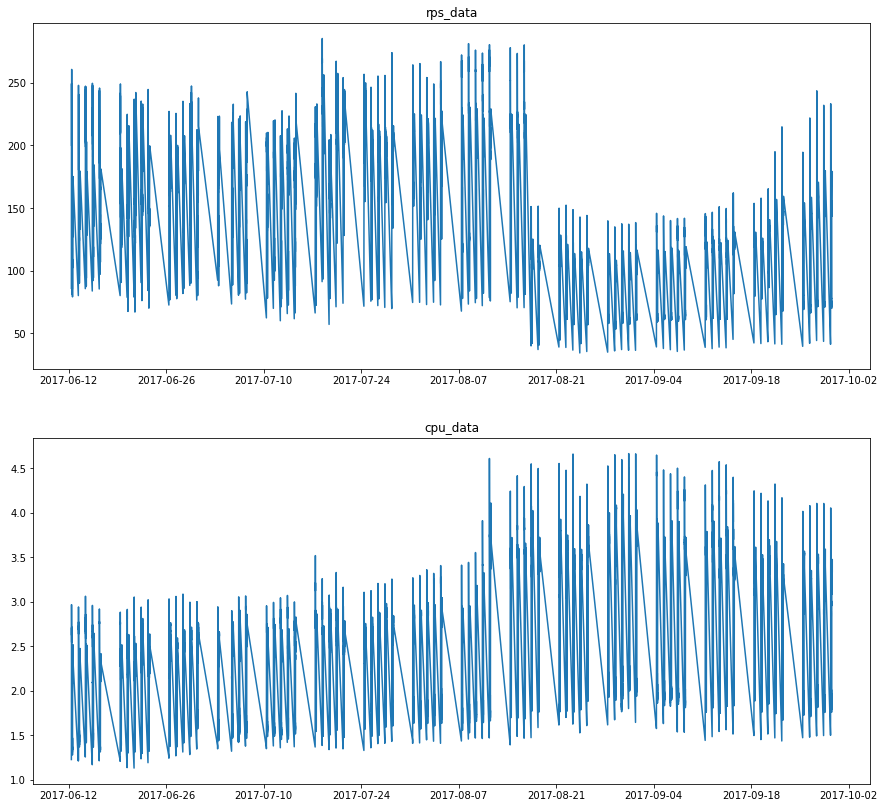

In [8]:
plt.figure(figsize=(15, 14))
plt.subplot(211)
plt.plot(rps_data)
plt.title('rps_data')
plt.subplot(212)
plt.plot(cpu_data)
plt.title('cpu_data')
plt.show()

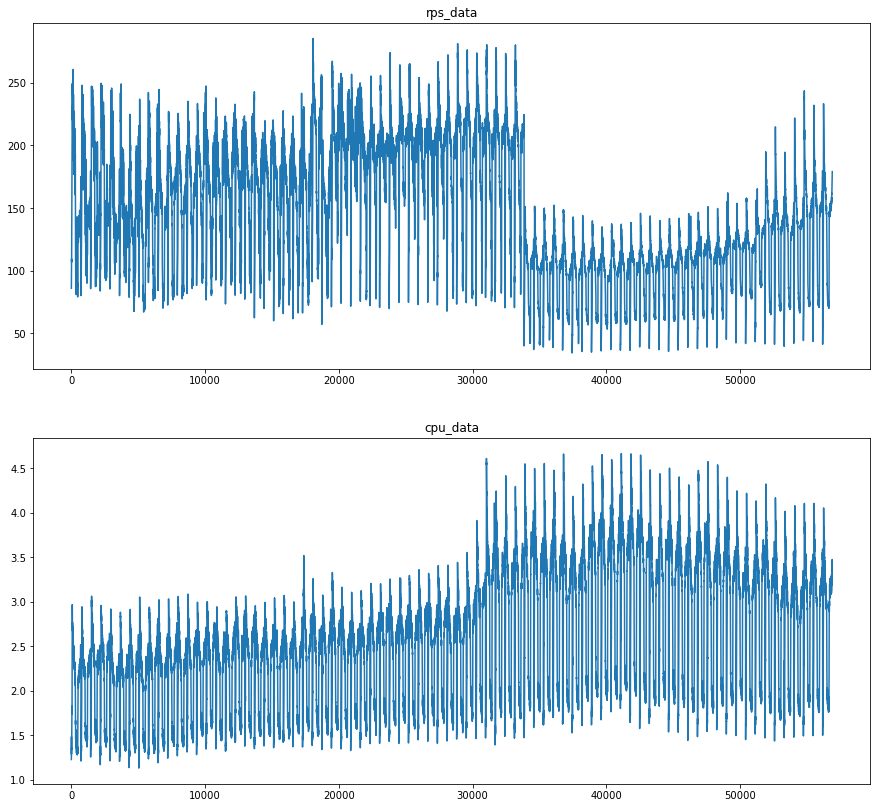

In [9]:
plt.figure(figsize=(15, 14))
plt.subplot(211)
plt.plot(rps_data_ndarray.ravel())
plt.title('rps_data')
plt.subplot(212)
plt.plot(cpu_data_ndarray.ravel())
plt.title('cpu_data')
plt.show()

# Data normalization

In [10]:
# Original
rps_data_ndarray_orgnorm = (rps_data_ndarray.T / rps_data_ndarray.max(axis=1)).T
# Rescaling
rps_data_ndarray_rescaling = ((rps_data_ndarray.T - rps_data_ndarray.min(axis=1)) / (rps_data_ndarray.max(axis=1) - rps_data_ndarray.min(axis=1))).T
# Mean normalisation
rps_data_ndarray_meannorm = ((rps_data_ndarray.T - rps_data_ndarray.mean(axis=1)) / (rps_data_ndarray.max(axis=1) - rps_data_ndarray.min(axis=1))).T
# Standardization
rps_data_ndarray_std = ((rps_data_ndarray.T - rps_data_ndarray.mean(axis=1)) / rps_data_ndarray.std(axis=1)).T

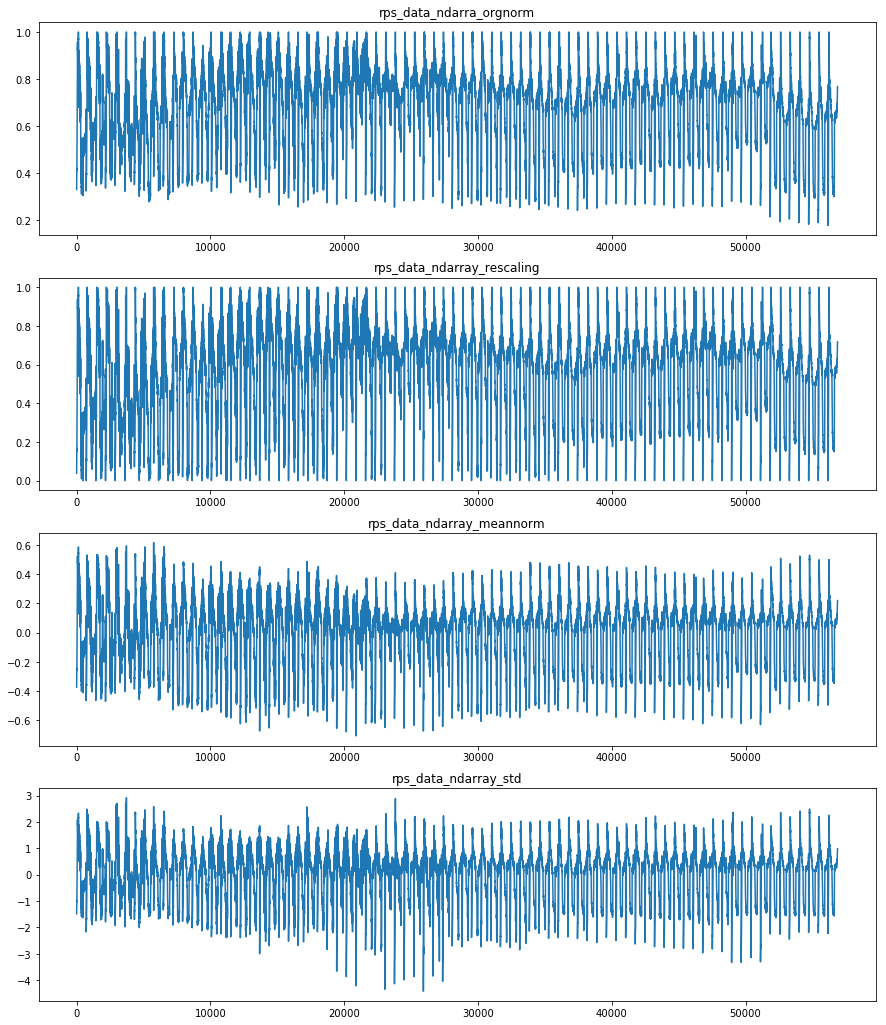

In [11]:
plt.figure(figsize=(15, 18))
plt.subplot(411)
plt.plot(rps_data_ndarray_orgnorm.ravel())
plt.title('rps_data_ndarra_orgnorm')
plt.subplot(412)
plt.plot(rps_data_ndarray_rescaling.ravel())
plt.title('rps_data_ndarray_rescaling')
plt.subplot(413)
plt.plot(rps_data_ndarray_meannorm.ravel())
plt.title('rps_data_ndarray_meannorm')
plt.subplot(414)
plt.plot(rps_data_ndarray_std.ravel())
plt.title('rps_data_ndarray_std')
plt.show()

In [12]:
rps_data_ndarray_std.shape

(79L, 720L)

### Conclusion
> Choose 4th normalisation method: Standardization

In [13]:
def normalize_data(data_ndarray):
    """
    Standardization the np.ndarray data
    
    Inputs:
    - data_ndarray: np.ndarray data which shape is (days x pdd)
    
    Outputs:
    - Standardization data the same shape with data_ndarray
    """
    return ((data_ndarray.T - data_ndarray.mean(axis=1)) / data_ndarray.std(axis=1)).T

# Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
# normalize data
rps_data_ndarray_std = normalize_data(rps_data_ndarray)
cpu_data_ndarray_std = normalize_data(cpu_data_ndarray)

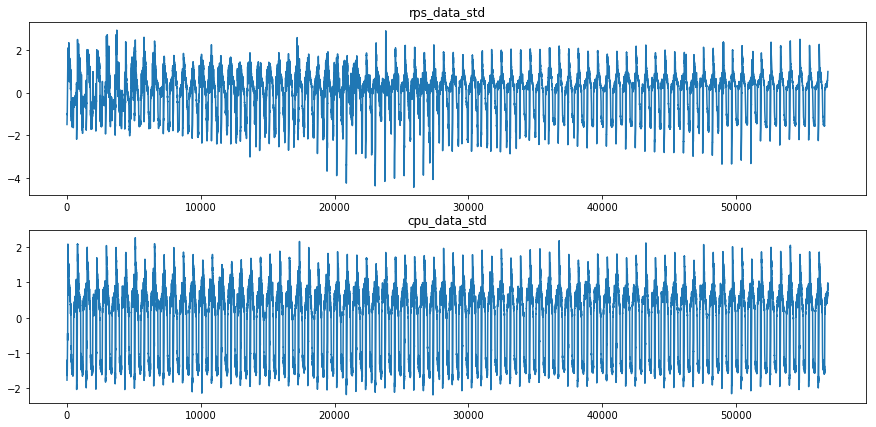

In [16]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(rps_data_ndarray_std.ravel())
plt.title('rps_data_std')
plt.subplot(212)
plt.plot(cpu_data_ndarray_std.ravel())
plt.title('cpu_data_std')
plt.show()

In [89]:
kmeans_rps = KMeans(init='k-means++', n_clusters=2)
kmeans_rps.fit(rps_data_ndarray_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
kmeans_cpu = KMeans(init='k-means++', n_clusters=2)
kmeans_cpu.fit(cpu_data_ndarray_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
kmeans_rps.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
kmeans_cpu.labels_

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [21]:
from sklearn.model_selection import train_test_split

In [208]:
# split the data of train set (70) and test set (9)
train, test, train_labels, test_labels = train_test_split(rps_data_ndarray_std,
                                                          kmeans_rps.labels_,
                                                          test_size=9,
                                                          random_state=42)

Save the training set and test set

In [209]:
# np.hstack or np.concatenate is also ok
np.append(train, np.reshape(train_labels, (train_labels.shape[0], 1)), axis=1)

array([[-2.01971405, -2.00334615, -1.93881842, ...,  1.03506159,
         1.02168302,  0.        ],
       [-2.41993695, -2.27227939, -1.97855217, ...,  1.13292266,
         1.15525314,  0.        ],
       [-4.14293803, -4.04470793, -3.78340007, ...,  0.79348578,
         0.702658  ,  0.        ],
       ..., 
       [-3.30917838, -3.27939158, -3.21409677, ...,  0.82478063,
         0.84748724,  0.        ],
       [-2.3551611 , -2.26809847, -2.0618211 , ...,  1.84146662,
         1.59250589,  0.        ],
       [-2.3616576 , -2.24021902, -1.99610046, ...,  0.75561045,
         0.73539608,  0.        ]])

In [128]:
np.append(test, np.reshape(test_labels, (test_labels.shape[0], 1)), axis=1)

array([[-2.86211807, -2.69206103, -2.31556402, ...,  0.79492475,
         0.75942625,  0.        ],
       [-1.48759399, -1.43903612, -1.32140485, ...,  0.36340848,
         0.38878757,  1.        ],
       [-2.52683549, -2.43121286, -2.21743131, ...,  1.7472656 ,
         1.76738205,  0.        ],
       ..., 
       [-1.9172404 , -1.81049226, -1.56166364, ...,  1.23364783,
         1.21490807,  0.        ],
       [-3.15356227, -2.99091229, -2.66451899, ...,  0.67301574,
         0.66298954,  0.        ],
       [-1.92990982, -1.83409721, -1.61086145, ...,  0.83659553,
         0.82427123,  1.        ]])

In [141]:
def save_train_test(metric, array, labels, test_size, random_state=42, return_data=False):
    """
    Split the labled data into training set and test set
    The save them in the local directory
    
    Inputs:
    - metric: The metric_name
    - array: The ndarray data (days x ppd)
    - labels: The labels of the data (days, )
    - test_size: Size of test data
    - random_state: 
    
    Outputs:
    * Generate two files
    * The last element of each row is the label
    - (training_data, test_data): training and test data with labels
    """
    train, test, train_labels, test_labels = train_test_split(array,
                                                          labels,
                                                          test_size=test_size,
                                                          random_state=random_state)
    np.save(metric+'_training', np.append(train, np.reshape(train_labels, (train_labels.shape[0], 1)), axis=1))
    np.save(metric+'_test', np.append(test, np.reshape(test_labels, (test_labels.shape[0], 1)), axis=1))
    if return_data:
        return np.append(train, np.reshape(train_labels, (train_labels.shape[0], 1)), axis=1), 
            np.append(test, np.reshape(test_labels, (test_labels.shape[0], 1)), axis=1)

In [142]:
save_train_test('rps_data', rps_data_ndarray_std, kmeans_rps.labels_, test_size=9)
save_train_test('cpu_data', cpu_data_ndarray_std, kmeans_cpu.labels_, test_size=9)

Have a Test

In [143]:
cpu_data_test = np.load('cpu_data_test.npy')
[i[-1] for i in cpu_data_test]

[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]

### Try Naive Bayes

Building and Evaluating the Model

In [23]:
from sklearn.naive_bayes import GaussianNB

In [148]:
# Initialize the classifier
gnb = GaussianNB()
# Train the classifier
model = gnb.fit(train, train_labels)
# Make predictions
preds = gnb.predict(test)
print(preds)

[0 1 0 0 0 0 0 0 1]


Evaluating the Model's Accuracy

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
# Evaluate accuracy
print(accuracy_score(test_labels, preds))

1.0


Test the model: Cpu data

In [27]:
from data_utils import *

In [98]:
test_data_ndarray_std = normalize_load('test_data.csv')

In [99]:
print(gnb.predict(test_data_ndarray_std))

[0 0 0 0 0 0]


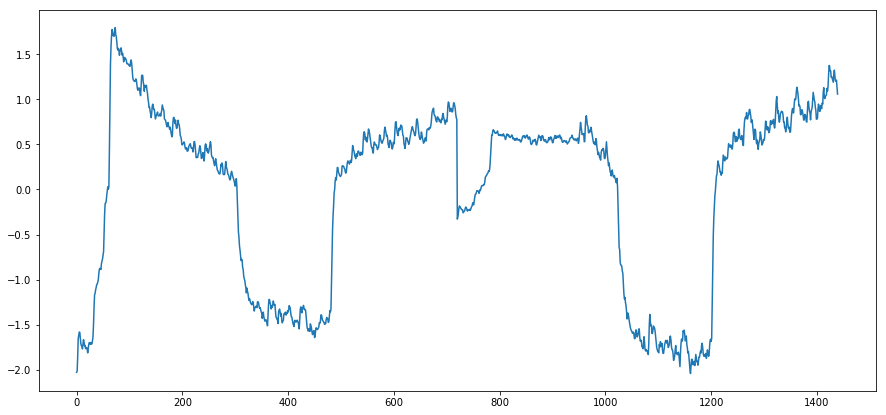

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(test_data_ndarray_std.ravel()[-1440:])
plt.show()

### Try SVM: Linear SVM

In [31]:
from sklearn import svm

In [95]:
# Initialize the classifier
clf = svm.LinearSVC()
# Train the classifier
clf.fit(train, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [96]:
# Make predictions
preds = clf.predict(test)
print(preds)

[0 1 0 0 0 0 0 0 1]


In [97]:
print(accuracy_score(test_labels, preds))

1.0


Test the model

In [44]:
print(gnb.predict(test_data_ndarray_std))

[1 1 1 1 1 0]


In [152]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

### Conclusion  
> Gaussian Naive Bayes and Linear SVM can almost perfectly classifier our data!

# Divide the original data

In [76]:
np.where(kmeans_cpu.labels_ == 0)

(array([ 3,  6,  8, 10, 12, 13, 14, 15, 16, 17, 18, 20, 23, 26, 29, 30, 31,
        32, 34, 36, 38, 41, 43, 44, 47, 53, 54, 56, 58, 61, 65, 71], dtype=int64),)

In [77]:
np.where(kmeans_cpu.labels_ == 1)

(array([ 0,  1,  2,  4,  5,  7,  9, 11, 19, 21, 22, 24, 25, 27, 28, 33, 35,
        37, 39, 40, 42, 45, 46, 48, 49, 50, 51, 52, 55, 57, 59, 60, 62, 63,
        64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78], dtype=int64),)

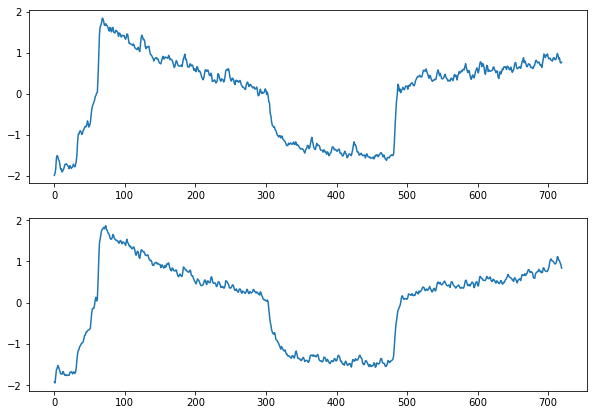

In [88]:
plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
plt.plot(cpu_data_ndarray_std[33])
plt.subplot(2,1,2)
plt.plot(cpu_data_ndarray_std[77])
plt.show()

In [104]:
# data label 1 means it is positive sample
rps_data_1 = rps_data_ndarray_std[np.where(kmeans_rps.labels_ == 0)]
cpu_data_1 = cpu_data_ndarray_std[np.where(kmeans_cpu.labels_ == 1)]
# data label 1 means it is negative sample
rps_data_0 = rps_data_ndarray_std[np.where(kmeans_rps.labels_ == 1)]
cpu_data_0 = cpu_data_ndarray_std[np.where(kmeans_cpu.labels_ == 0)]

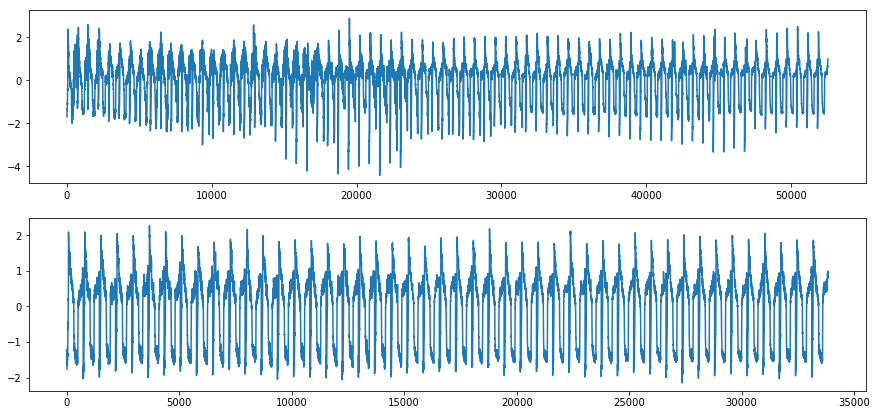

In [105]:
plt.figure(figsize=(15, 7))
plt.subplot(2,1,1)
plt.plot(rps_data_1.ravel())
plt.subplot(2,1,2)
plt.plot(cpu_data_1.ravel())
plt.show()

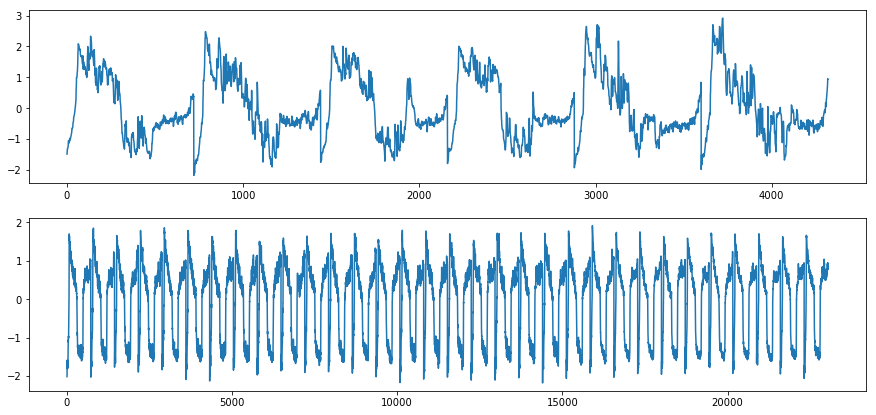

In [145]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(rps_data_0.ravel())
plt.subplot(212)
plt.plot(cpu_data_0.ravel())
plt.show()

In [166]:
# save data
np.save('rps_data_1', rps_data_1)
np.save('rps_data_0', rps_data_0)
np.save('cpu_data_1', cpu_data_1)
np.save('cpu_data_0', cpu_data_0)

np.save('rps_data_labeled', np.append(rps_data_1, rps_data_0, axis=0))
np.save('cpu_data_labeled', np.append(cpu_data_1, cpu_data_0, axis=0))

# Filter new data using trained model

Save training and test data

In [167]:
cpu_data_training = np.load('cpu_data_training.npy')
cpu_data_test = np.load('cpu_data_test.npy')

In [196]:
np.hsplit(cpu_data_test, np.array([cpu_data_test[0].shape[0] - 1]))

[array([[-2.08201632, -2.04692856, -1.84533869, ...,  0.97274207,
          0.92242932,  0.89556653],
        [-1.76384815, -1.733796  , -1.68626439, ...,  0.72932989,
          0.725085  ,  0.63937435],
        [-1.77601138, -1.63079891, -1.4846434 , ...,  1.00036866,
          1.01829454,  0.92828941],
        ..., 
        [-1.86099119, -1.89849954, -1.8094158 , ...,  1.03070559,
          1.0571796 ,  1.06214241],
        [-2.01298076, -1.95972391, -1.83254416, ...,  0.77152802,
          0.72762272,  0.65175667],
        [-1.81986355, -1.81539985, -1.74743798, ...,  0.78053359,
          0.72068397,  0.6796182 ]]), array([[ 0.],
        [ 1.],
        [ 1.],
        [ 0.],
        [ 0.],
        [ 1.],
        [ 0.],
        [ 1.],
        [ 1.]])]

In [194]:
cpu_data_test

array([[-2.08201632, -2.04692856, -1.84533869, ...,  0.92242932,
         0.89556653,  0.        ],
       [-1.76384815, -1.733796  , -1.68626439, ...,  0.725085  ,
         0.63937435,  1.        ],
       [-1.77601138, -1.63079891, -1.4846434 , ...,  1.01829454,
         0.92828941,  1.        ],
       ..., 
       [-1.86099119, -1.89849954, -1.8094158 , ...,  1.0571796 ,
         1.06214241,  0.        ],
       [-2.01298076, -1.95972391, -1.83254416, ...,  0.72762272,
         0.65175667,  1.        ],
       [-1.81986355, -1.81539985, -1.74743798, ...,  0.72068397,
         0.6796182 ,  1.        ]])

In [205]:
def load_train_test(train_filename, test_filename):
    """
    Load the train, test with their labels
    """
    train_data = np.load(train_filename)
    test_data = np.load(test_filename)
    train, train_labels = np.hsplit(
        train_data, np.array([train_data[0].shape[0] - 1]))
    test, test_labels = np.hsplit(
        test_data, np.array([test_data[0].shape[0] - 1]))
    return train, test, train_labels.ravel(), test_labels.ravel()


In [217]:
train, test, train_labels, test_labels = load_train_test('cpu_data_training.npy', 'cpu_data_test.npy')

Save gnb model

In [157]:
from sklearn.externals import joblib

In [154]:
def save_gnb_model(metric, train, test, train_labels, test_labels, return_data=False):
    """
    Generate Gaussian Naive Bayes model of the training set and save the model
    Can also return model if you want
    
    Inputs:
    - metric: The name of metric
    - train:
    - test:
    - train_labels:
    - test_labels
    - return_data: Boolean values, True means return the model, default is False

    Outputs:
    """
    # Initialize the classifier
    gnb = GaussianNB()
    # Train the classifier
    model = gnb.fit(train, train_labels)
    # Make predictions
    preds = gnb.predict(test)
    # Save model
    joblib.dump(gnb, metric+'_gnb_model.pkl') 
    # Evaluate accuracy
    print(accuracy_score(test_labels, preds))
    if return_data:
        return model

In [159]:
# model = save_gnb_model('rps', train, test, train_labels, test_labels, return_data=True)

1.0


In [233]:
def load_model(model_path):
    """Load the model (.pkl)"""
    return joblib.load(model_path)

In [229]:
model = load_model('cpu_gnb_model.pkl')

In [207]:
model = save_gnb_model('cpu', train, test, train_labels, test_labels, return_data=True)

1.0


In [230]:
preds = model.predict(test)

In [231]:
test[np.where(preds)]

array([[-1.76384815, -1.733796  , -1.68626439, ...,  0.72932989,
         0.725085  ,  0.63937435],
       [-1.77601138, -1.63079891, -1.4846434 , ...,  1.00036866,
         1.01829454,  0.92828941],
       [-1.97315356, -1.91518574, -1.86126567, ...,  0.86512873,
         0.86489956,  0.83382488],
       [-2.01298076, -1.95972391, -1.83254416, ...,  0.77152802,
         0.72762272,  0.65175667],
       [-1.81986355, -1.81539985, -1.74743798, ...,  0.78053359,
         0.72068397,  0.6796182 ]])

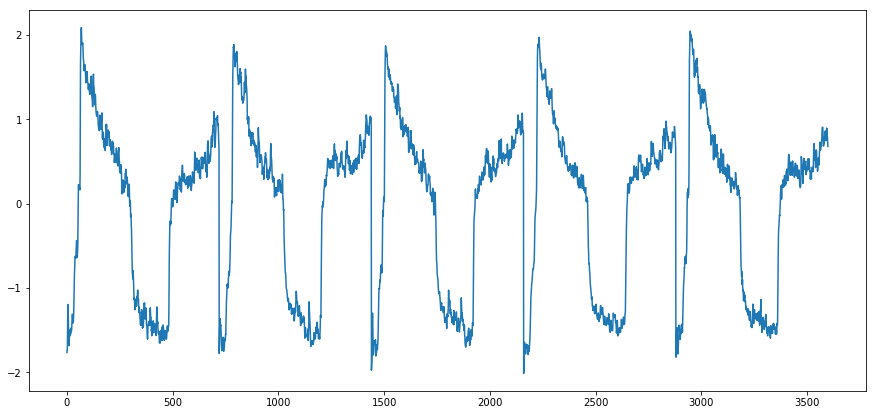

In [232]:
plt.figure(figsize=(15, 7))
plt.plot(test[np.where(preds==1)].ravel())
plt.show()

In [ ]:
def split_data(array, model):
    """
    Split data into two groups: the positive data and the negative data 
    
    Inputs:
    - array: Data to by split (days x ppd)
    - model: The trained model that can predict correctly
    
    Outputs:
    - (positive data, negative data)
    """
    preds = model.predict(array)
    return array[np.where(preds==1)], array[np.where(preds==0)]